In [1]:
#Step 1 -- Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# step 2 -- Reading the Dataset

data = pd.read_csv('heart_attack_china.csv')
data.head()


,Patient_ID,Age,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,...,Hospital_Availability,TCM_Use,Employment_Status,Education_Level,Income_Level,Blood_Pressure,Chronic_Kidney_Disease,Previous_Heart_Attack,CVD_Risk_Score,Heart_Attack
0,1,55,Male,Non-Smoker,No,No,Yes,Normal,High,High,...,Low,Yes,Unemployed,Primary,Low,104,Yes,No,78,No
1,2,66,Female,Smoker,Yes,No,No,Low,Medium,High,...,High,No,Unemployed,Secondary,Middle,142,No,No,49,No
2,3,69,Female,Smoker,No,No,No,Low,Medium,High,...,Low,No,Unemployed,Primary,High,176,No,No,31,No
3,4,45,Female,Smoker,No,Yes,No,Normal,Medium,Low,...,Medium,Yes,Employed,Primary,Low,178,No,Yes,23,No
4,5,39,Female,Smoker,No,No,No,Normal,Medium,Medium,...,Low,No,Retired,Higher,Middle,146,Yes,No,79,No


In [3]:
# Extract features and target
X = data.drop('Heart_Attack', axis=1)  # Drop target column to get features
y = data['Heart_Attack']    

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239266 entries, 0 to 239265
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Patient_ID              239266 non-null  int64 
 1   Age                     239266 non-null  int64 
 2   Gender                  239266 non-null  object
 3   Smoking_Status          239266 non-null  object
 4   Hypertension            239266 non-null  object
 5   Diabetes                239266 non-null  object
 6   Obesity                 239266 non-null  object
 7   Cholesterol_Level       239266 non-null  object
 8   Air_Pollution_Exposure  239266 non-null  object
 9   Physical_Activity       239266 non-null  object
 10  Diet_Score              239266 non-null  object
 11  Stress_Level            239266 non-null  object
 12  Alcohol_Consumption     239266 non-null  object
 13  Family_History_CVD      239266 non-null  object
 14  Healthcare_Access       239266 non-n

In [5]:
data.nunique()

Patient_ID                239266
Age                           60
Gender                         2
Smoking_Status                 2
Hypertension                   2
Diabetes                       2
Obesity                        2
Cholesterol_Level              3
Air_Pollution_Exposure         3
Physical_Activity              3
Diet_Score                     3
Stress_Level                   3
Alcohol_Consumption            2
Family_History_CVD             2
Healthcare_Access              3
Rural_or_Urban                 2
Region                         5
Province                       8
Hospital_Availability          3
TCM_Use                        2
Employment_Status              3
Education_Level                3
Income_Level                   3
Blood_Pressure                90
Chronic_Kidney_Disease         2
Previous_Heart_Attack          2
CVD_Risk_Score                90
Heart_Attack                   2
dtype: int64

In [6]:
data.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
Smoking_Status                0
Hypertension                  0
Diabetes                      0
Obesity                       0
Cholesterol_Level             0
Air_Pollution_Exposure        0
Physical_Activity             0
Diet_Score                    0
Stress_Level                  0
Alcohol_Consumption           0
Family_History_CVD            0
Healthcare_Access             0
Rural_or_Urban                0
Region                        0
Province                      0
Hospital_Availability         0
TCM_Use                       0
Employment_Status             0
Education_Level           59617
Income_Level                  0
Blood_Pressure                0
Chronic_Kidney_Disease        0
Previous_Heart_Attack         0
CVD_Risk_Score                0
Heart_Attack                  0
dtype: int64

In [7]:
(data.isnull().sum()/len(data))*100 

Patient_ID                 0.00000
Age                        0.00000
Gender                     0.00000
Smoking_Status             0.00000
Hypertension               0.00000
Diabetes                   0.00000
Obesity                    0.00000
Cholesterol_Level          0.00000
Air_Pollution_Exposure     0.00000
Physical_Activity          0.00000
Diet_Score                 0.00000
Stress_Level               0.00000
Alcohol_Consumption        0.00000
Family_History_CVD         0.00000
Healthcare_Access          0.00000
Rural_or_Urban             0.00000
Region                     0.00000
Province                   0.00000
Hospital_Availability      0.00000
TCM_Use                    0.00000
Employment_Status          0.00000
Education_Level           24.91662
Income_Level               0.00000
Blood_Pressure             0.00000
Chronic_Kidney_Disease     0.00000
Previous_Heart_Attack      0.00000
CVD_Risk_Score             0.00000
Heart_Attack               0.00000
dtype: float64

In [8]:
# Drop irrelevant columns
data.drop(columns=["Education_Level"], axis=1, inplace=True)

In [9]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Smoking_Status', 'Hypertension',
       'Diabetes', 'Obesity', 'Cholesterol_Level', 'Air_Pollution_Exposure',
       'Physical_Activity', 'Diet_Score', 'Stress_Level',
       'Alcohol_Consumption', 'Family_History_CVD', 'Healthcare_Access',
       'Rural_or_Urban', 'Region', 'Province', 'Hospital_Availability',
       'TCM_Use', 'Employment_Status', 'Income_Level', 'Blood_Pressure',
       'Chronic_Kidney_Disease', 'Previous_Heart_Attack', 'CVD_Risk_Score',
       'Heart_Attack'],
      dtype='object')

In [10]:
print(data.Patient_ID.unique())

[     1      2      3 ... 239264 239265 239266]


In [11]:
data.describe()

,Patient_ID,Age,Blood_Pressure,CVD_Risk_Score
count,239266.000000,239266.000000,239266.000000,239266.000000
mean,119633.500000,59.466284,134.513378,54.485581
std,69070.289091,17.348308,25.991827,25.987743
min,1.000000,30.000000,90.000000,10.000000
25%,59817.250000,44.000000,112.000000,32.000000
50%,119633.500000,59.000000,135.000000,54.000000
75%,179449.750000,75.000000,157.000000,77.000000
max,239266.000000,89.000000,179.000000,99.000000


In [12]:
data.describe(include = "all")

,Patient_ID,Age,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,...,Province,Hospital_Availability,TCM_Use,Employment_Status,Income_Level,Blood_Pressure,Chronic_Kidney_Disease,Previous_Heart_Attack,CVD_Risk_Score,Heart_Attack
count,239266.000000,239266.000000,239266,239266,239266,239266,239266,239266,239266,239266,...,239266,239266,239266,239266,239266,239266.000000,239266,239266,239266.000000,239266
unique,NaN,NaN,2,2,2,2,2,3,3,3,...,8,3,2,3,3,NaN,2,2,NaN,2
top,NaN,NaN,Female,Non-Smoker,No,No,No,Normal,Medium,Low,...,Guangdong,High,No,Retired,High,NaN,No,No,NaN,No
freq,NaN,NaN,119948,119697,174557,212794,167521,80091,119593,80086,...,30162,79848,143949,79872,80149,NaN,203597,215306,NaN,210195
mean,119633.500000,59.466284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,134.513378,NaN,NaN,54.485581,NaN
std,69070.289091,17.348308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.991827,NaN,NaN,25.987743,NaN
min,1.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,10.000000,NaN
25%,59817.250000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,112.000000,NaN,NaN,32.000000,NaN
50%,119633.500000,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,135.000000,NaN,NaN,54.000000,NaN
75%,179449.750000,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,157.000000,NaN,NaN,77.000000,NaN


In [13]:
cat_col = data.select_dtypes(include=["object"]).columns
num_col = data.select_dtypes(include=np.number).columns
print("Categorical columns are")
print(cat_col)
print("Numerical columns are:")
print(num_col)

Categorical columns are
Index(['Gender', 'Smoking_Status', 'Hypertension', 'Diabetes', 'Obesity',
       'Cholesterol_Level', 'Air_Pollution_Exposure', 'Physical_Activity',
       'Diet_Score', 'Stress_Level', 'Alcohol_Consumption',
       'Family_History_CVD', 'Healthcare_Access', 'Rural_or_Urban', 'Region',
       'Province', 'Hospital_Availability', 'TCM_Use', 'Employment_Status',
       'Income_Level', 'Chronic_Kidney_Disease', 'Previous_Heart_Attack',
       'Heart_Attack'],
      dtype='object')
Numerical columns are:
Index(['Patient_ID', 'Age', 'Blood_Pressure', 'CVD_Risk_Score'], dtype='object')


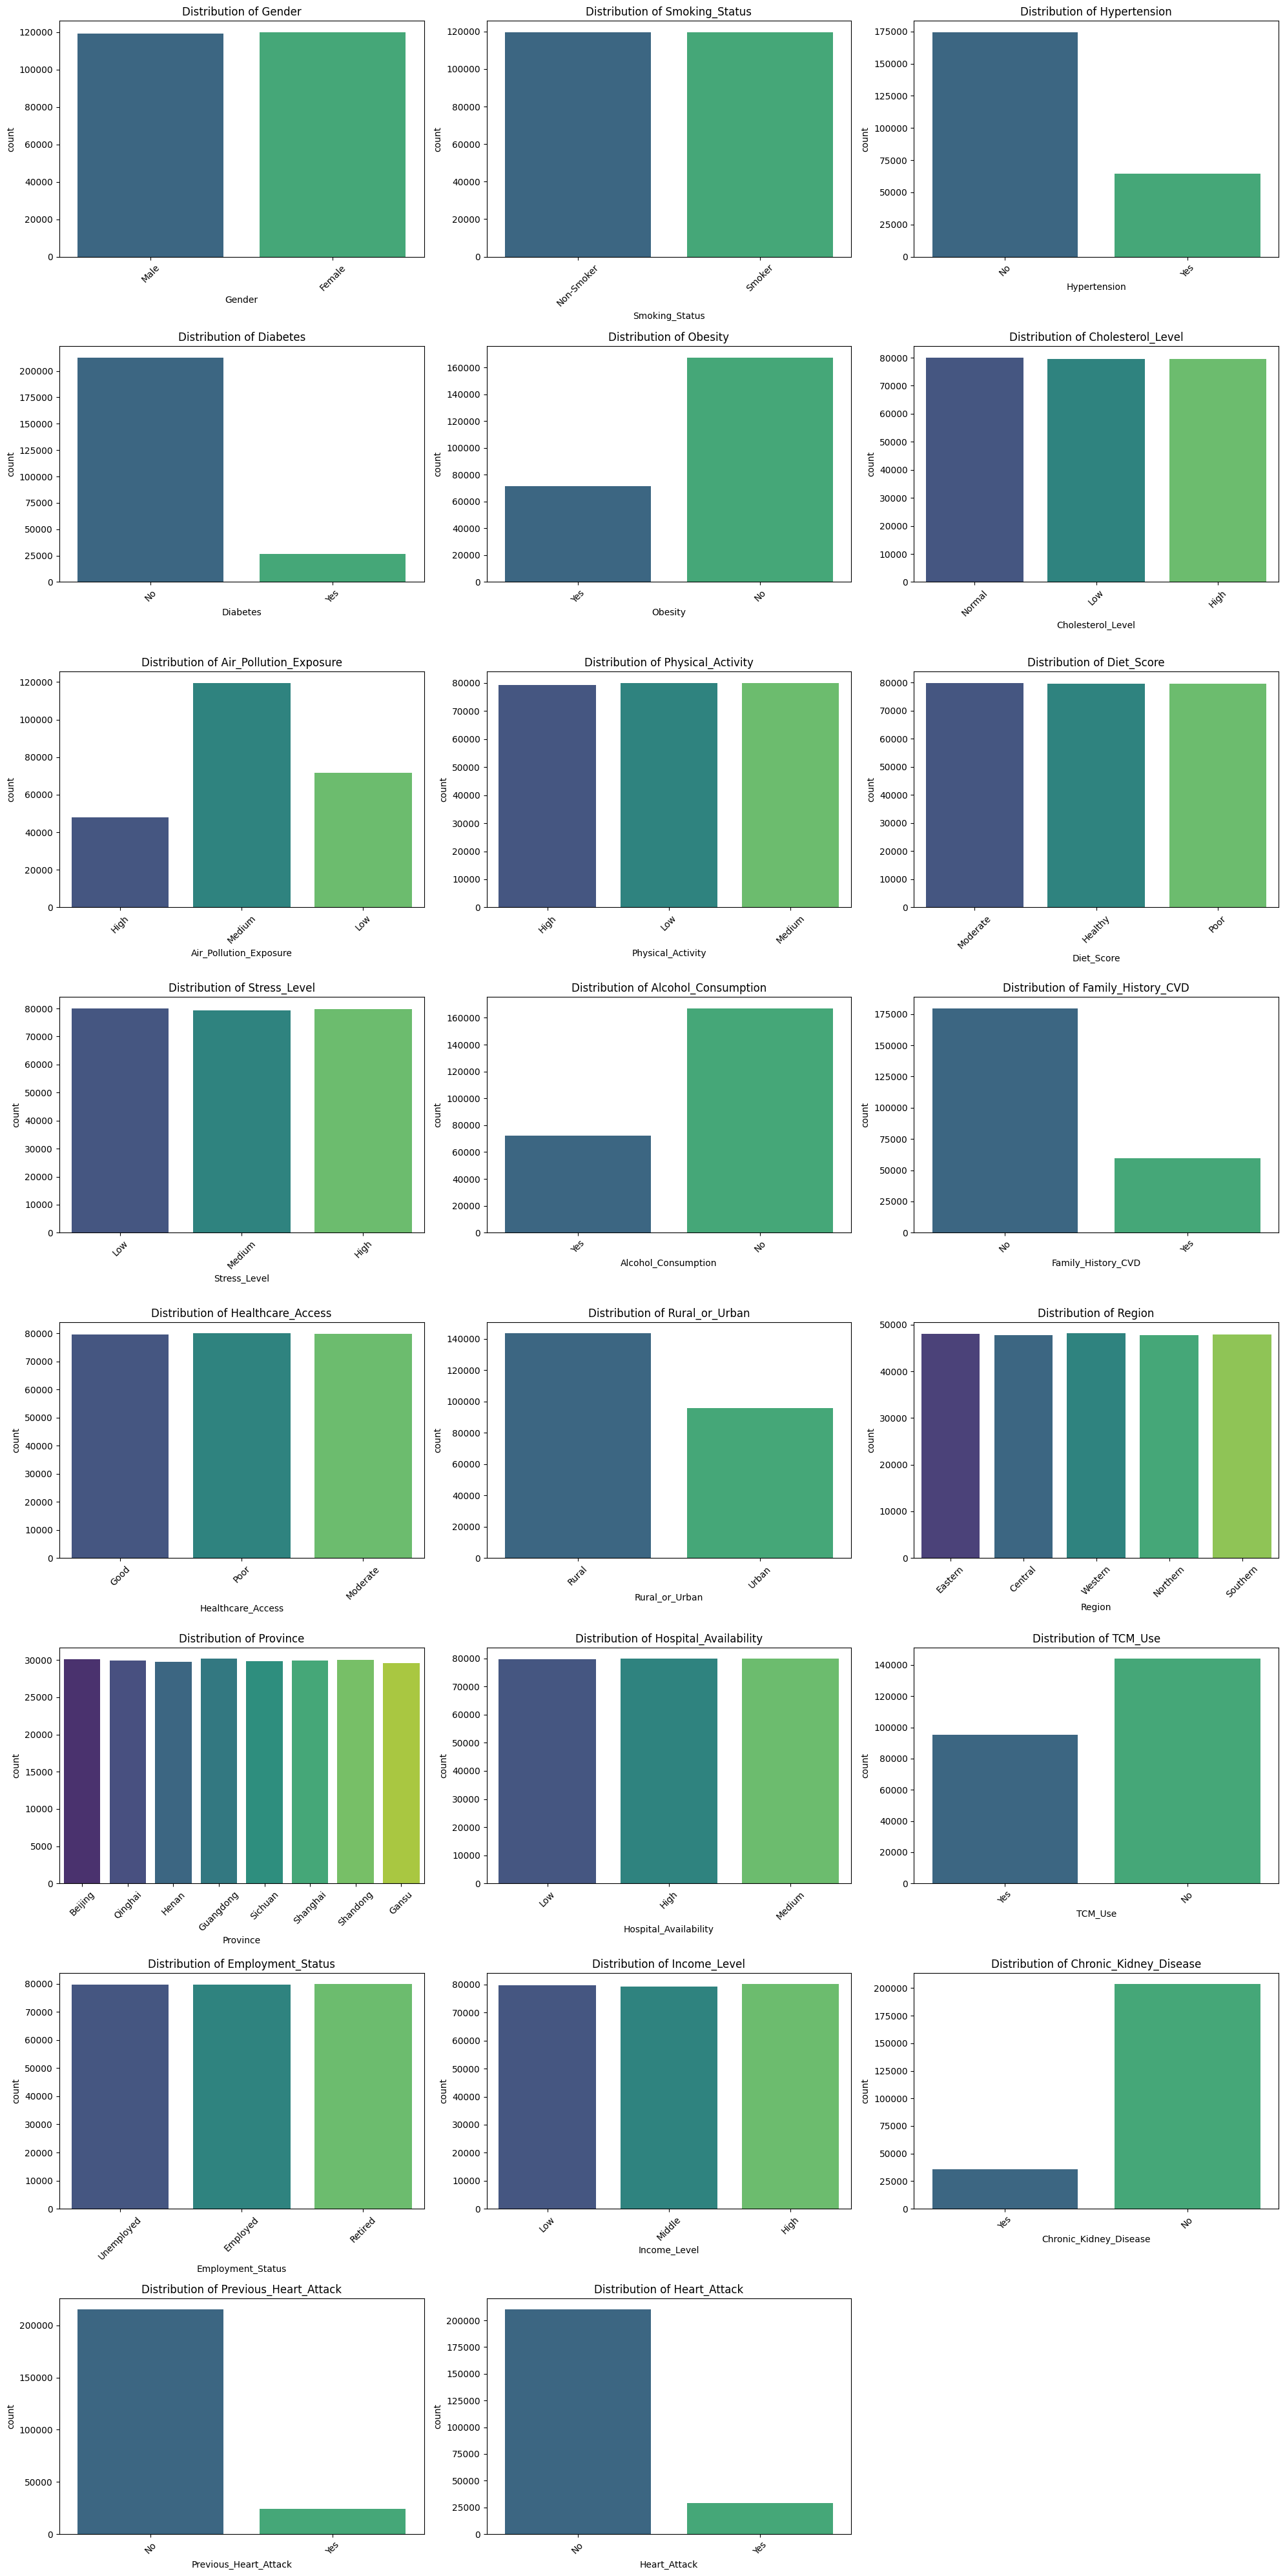

In [14]:
# Plot univariate analysis for categorical variables

plt.figure(figsize=(20, 40))
for i, col in enumerate(cat_col):
    plt.subplot(8, 3, i + 1)
    sns.countplot(x=data[col], palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

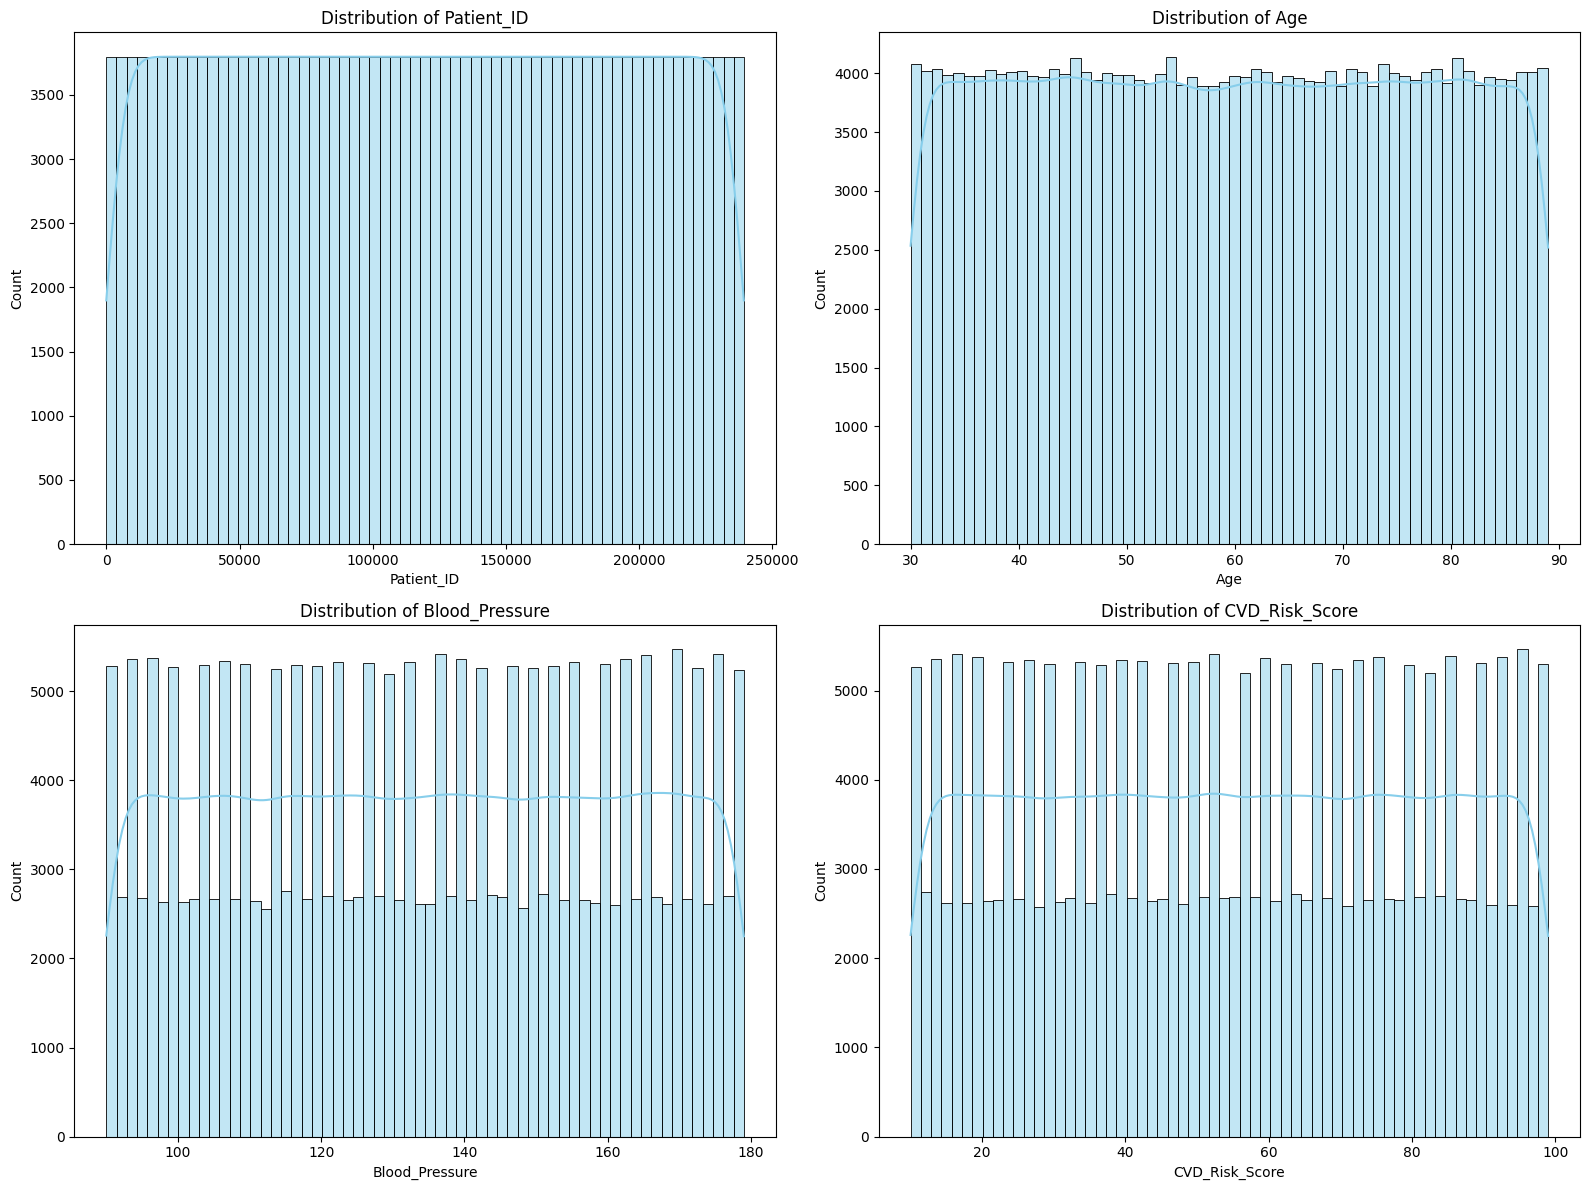

In [15]:
# Plot univariate analysis for numerical variables
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[col], kde=True, color="skyblue")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

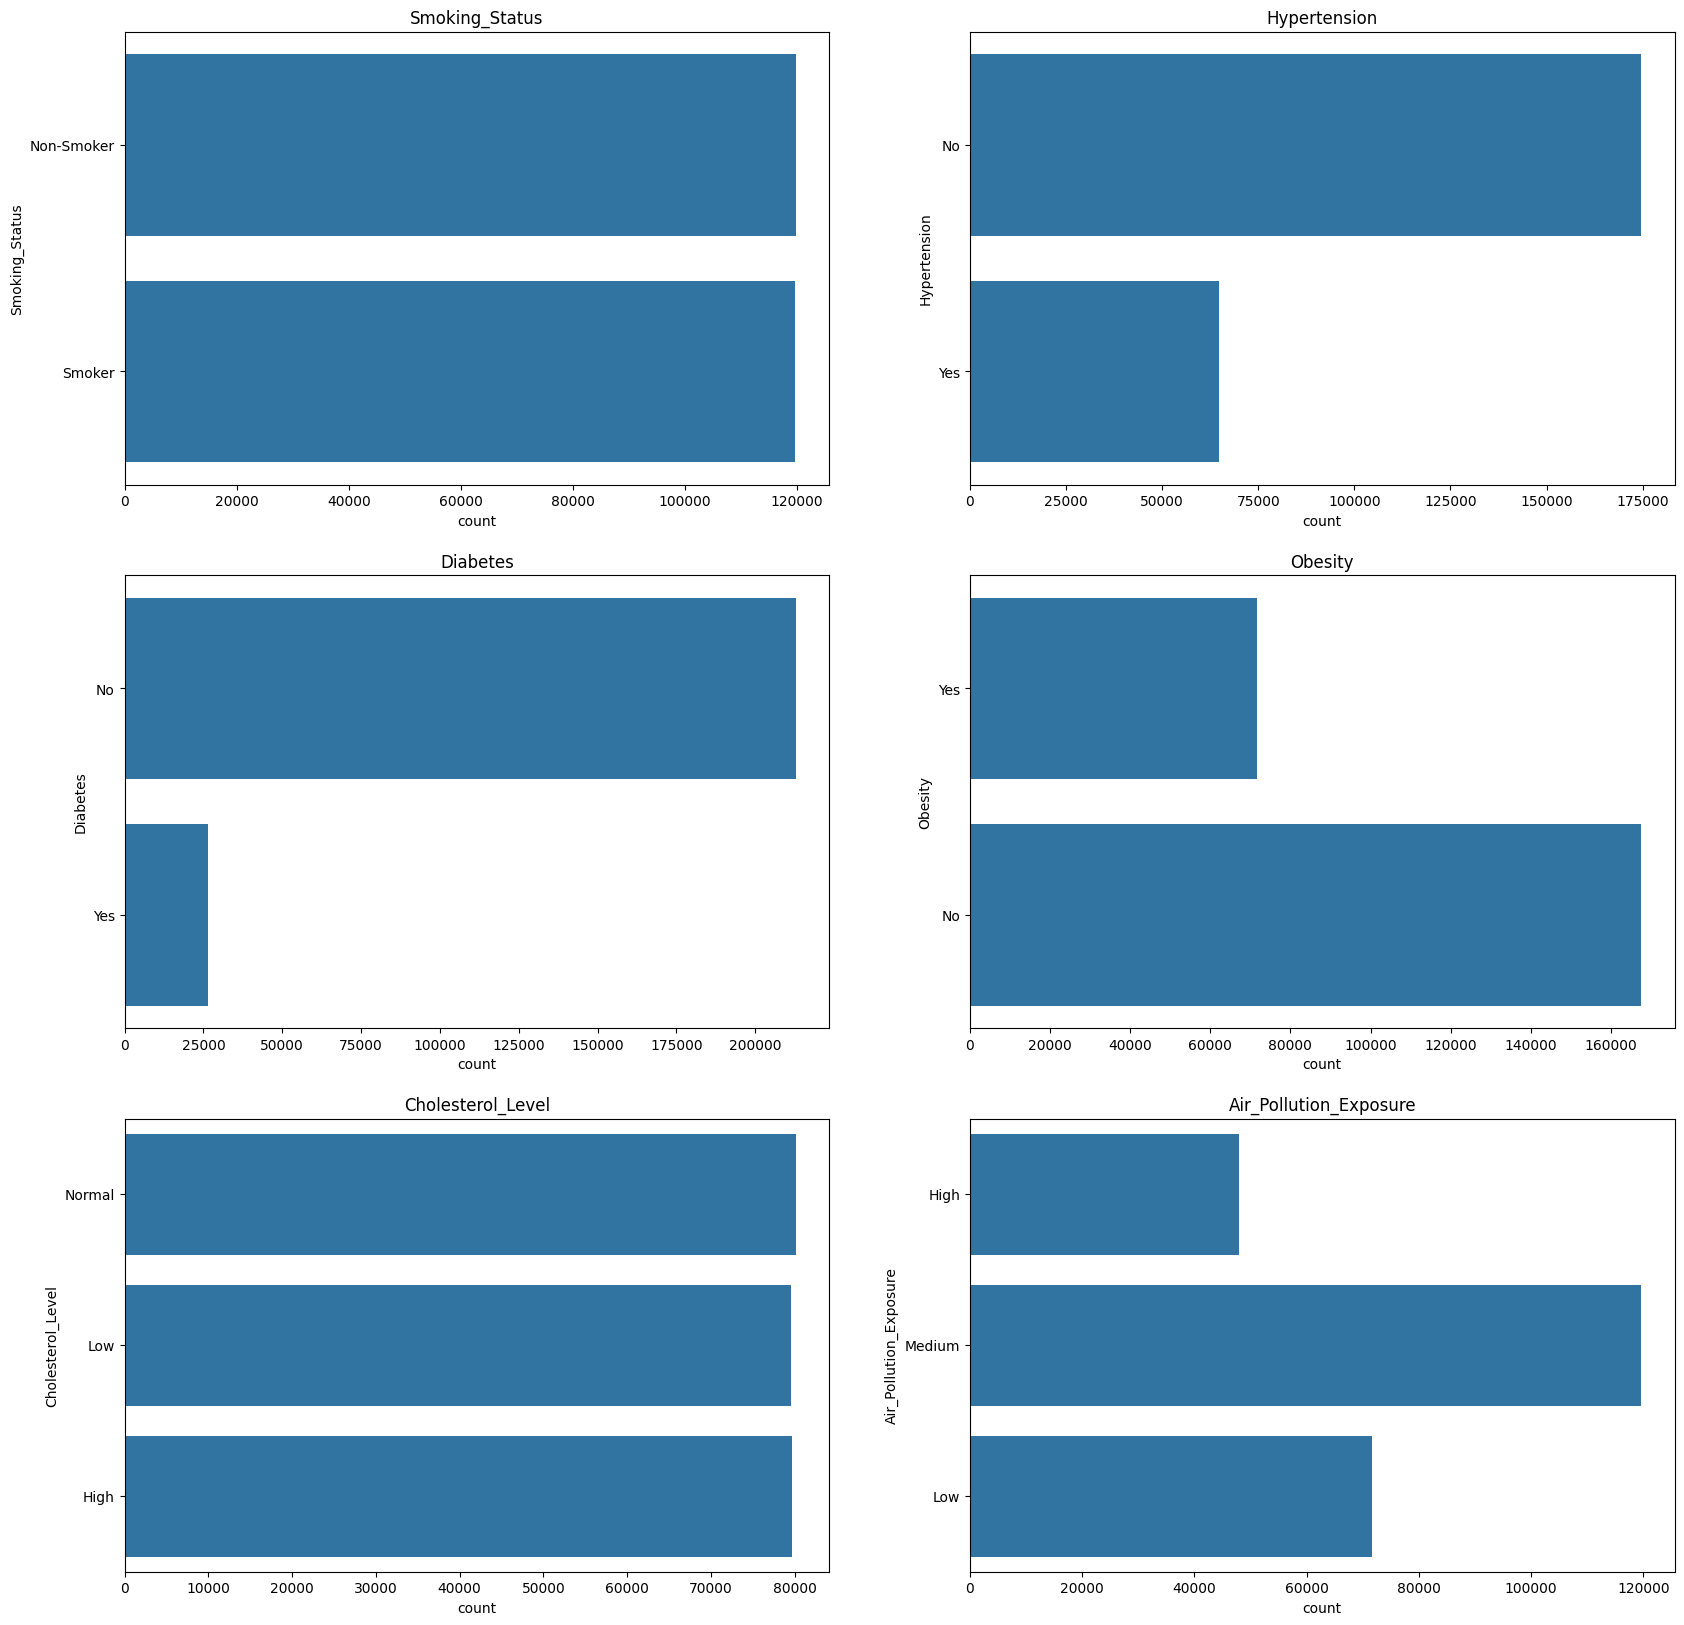

In [16]:
# create countplot for all the categorical columns in nx2 subplots where each subplot represents one column

plt.figure(figsize=(20,20))
for i in range(1,7):
    plt.subplot(3,2,i)
    plt.title(cat_col[i])
    sns.countplot(data=data[cat_col[i]])
plt.show()

In [17]:
# Outlier Remover 

for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    data = data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
data

,Patient_ID,Age,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,...,Province,Hospital_Availability,TCM_Use,Employment_Status,Income_Level,Blood_Pressure,Chronic_Kidney_Disease,Previous_Heart_Attack,CVD_Risk_Score,Heart_Attack
0,1,55,Male,Non-Smoker,No,No,Yes,Normal,High,High,...,Beijing,Low,Yes,Unemployed,Low,104,Yes,No,78,No
1,2,66,Female,Smoker,Yes,No,No,Low,Medium,High,...,Qinghai,High,No,Unemployed,Middle,142,No,No,49,No
2,3,69,Female,Smoker,No,No,No,Low,Medium,High,...,Henan,Low,No,Unemployed,High,176,No,No,31,No
3,4,45,Female,Smoker,No,Yes,No,Normal,Medium,Low,...,Qinghai,Medium,Yes,Employed,Low,178,No,Yes,23,No
4,5,39,Female,Smoker,No,No,No,Normal,Medium,Medium,...,Guangdong,Low,No,Retired,Middle,146,Yes,No,79,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239261,239262,53,Male,Non-Smoker,No,No,No,Normal,Medium,Medium,...,Henan,High,Yes,Retired,Low,167,No,No,86,Yes
239262,239263,48,Female,Non-Smoker,No,No,Yes,Normal,Low,Medium,...,Shanghai,Medium,Yes,Unemployed,Low,179,No,No,25,No
239263,239264,57,Male,Smoker,Yes,No,No,Normal,Low,High,...,Gansu,Medium,Yes,Retired,Middle,136,No,No,89,No
239264,239265,42,Female,Non-Smoker,No,No,No,High,Medium,High,...,Sichuan,Low,Yes,Employed,Middle,159,No,No,72,Yes


<Figure size 1600x2000 with 0 Axes>

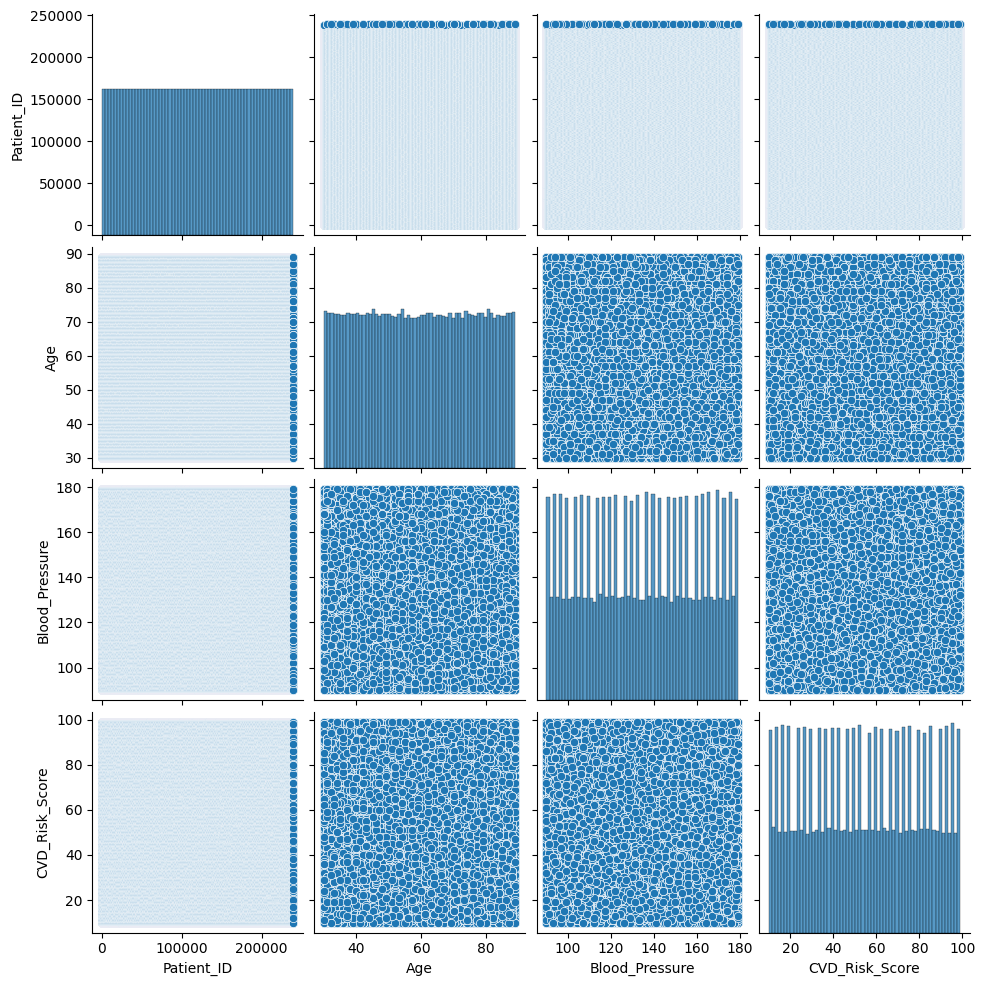

In [18]:
# pairplot
plt.figure(figsize=(16,20))
sns.pairplot(data)
plt.show()

In [19]:
data_num = data.select_dtypes(include = ["number"])
corr_matrix = data_num.corr()
corr_matrix

,Patient_ID,Age,Blood_Pressure,CVD_Risk_Score
Patient_ID,1.000000,-0.000555,0.000806,-0.000409
Age,-0.000555,1.000000,0.000381,-0.000967
Blood_Pressure,0.000806,0.000381,1.000000,0.005383
CVD_Risk_Score,-0.000409,-0.000967,0.005383,1.000000


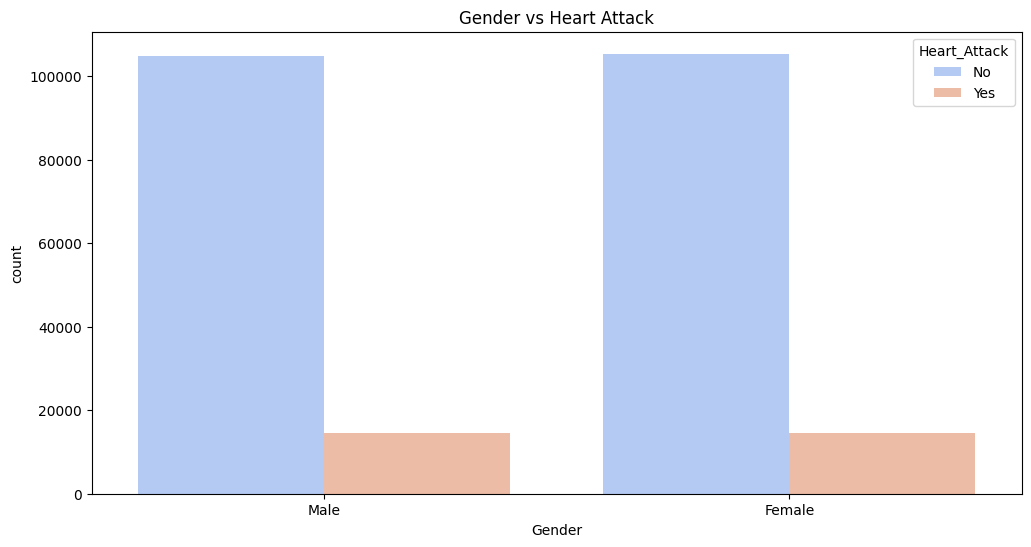

In [20]:
# Plot Bivariat analysis
# ------- Categorical vs Categorical -------
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Heart_Attack', data=data, palette='coolwarm')
plt.title('Gender vs Heart Attack')
plt.show()

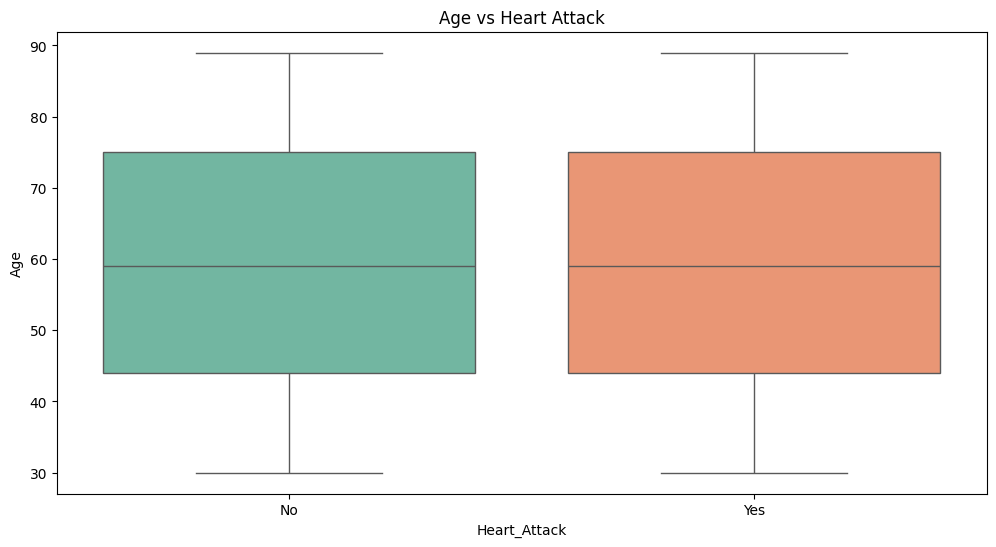

In [21]:
# ------- Numerical vs Categorical -------
plt.figure(figsize=(12, 6))
sns.boxplot(x='Heart_Attack', y='Age', data=data, palette='Set2')
plt.title('Age vs Heart Attack')
plt.show()

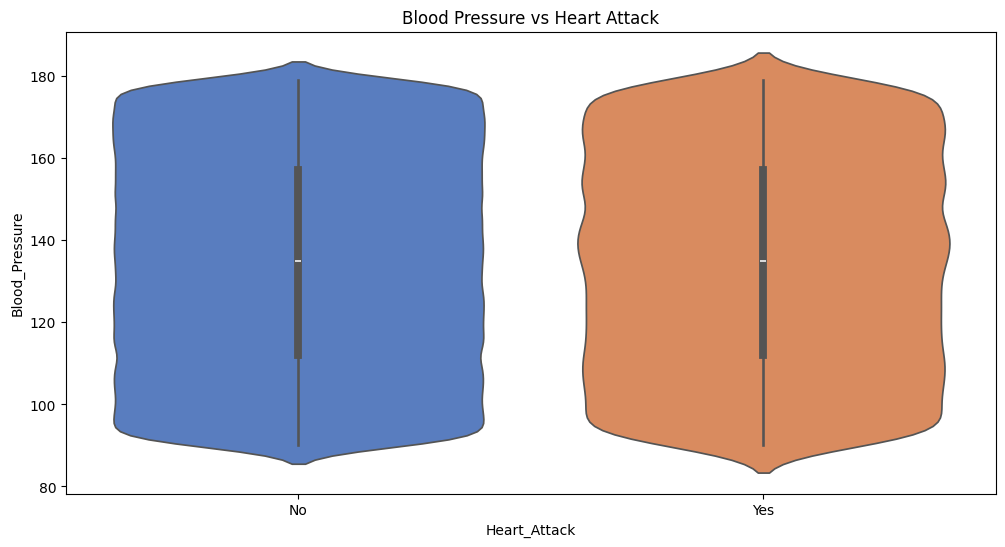

In [22]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Heart_Attack', y='Blood_Pressure', data=data, palette='muted')
plt.title('Blood Pressure vs Heart Attack')
plt.show()

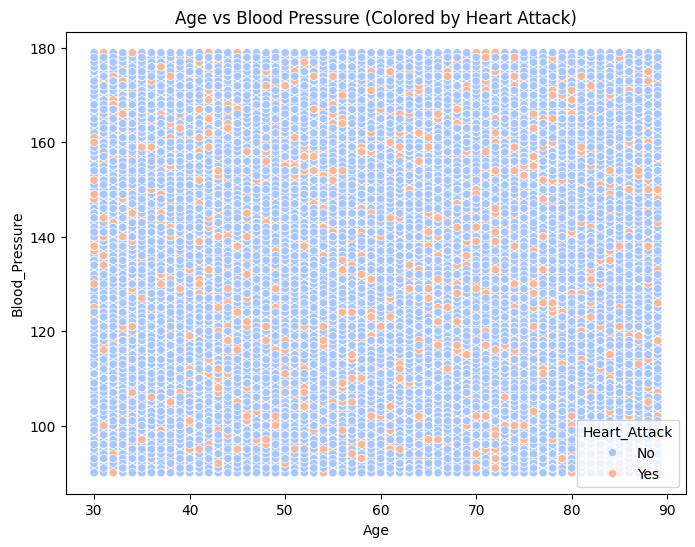

In [23]:
# ------- Numerical vs Numerical -------
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Blood_Pressure', hue='Heart_Attack', data=data, palette='coolwarm')
plt.title('Age vs Blood Pressure (Colored by Heart Attack)')
plt.show()

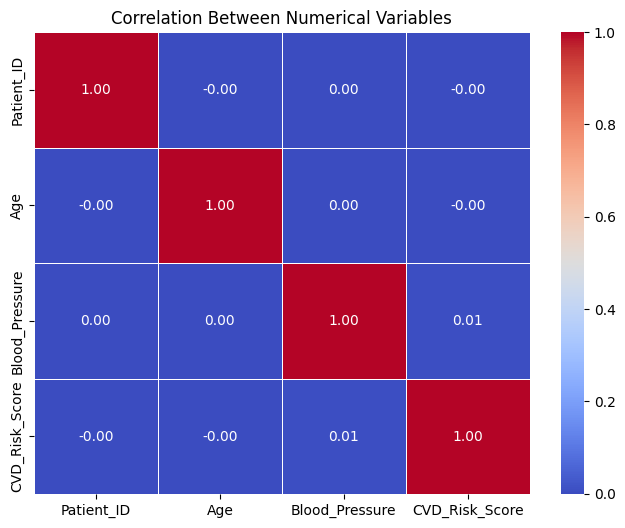

In [24]:
# ------- Correlation Matrix for Numerical Variables -------
plt.figure(figsize=(8, 6))
correlation = data[num_col].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Numerical Variables')
plt.show()

<h1>Logistic Regression</h1>

In [25]:
data

,Patient_ID,Age,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,...,Province,Hospital_Availability,TCM_Use,Employment_Status,Income_Level,Blood_Pressure,Chronic_Kidney_Disease,Previous_Heart_Attack,CVD_Risk_Score,Heart_Attack
0,1,55,Male,Non-Smoker,No,No,Yes,Normal,High,High,...,Beijing,Low,Yes,Unemployed,Low,104,Yes,No,78,No
1,2,66,Female,Smoker,Yes,No,No,Low,Medium,High,...,Qinghai,High,No,Unemployed,Middle,142,No,No,49,No
2,3,69,Female,Smoker,No,No,No,Low,Medium,High,...,Henan,Low,No,Unemployed,High,176,No,No,31,No
3,4,45,Female,Smoker,No,Yes,No,Normal,Medium,Low,...,Qinghai,Medium,Yes,Employed,Low,178,No,Yes,23,No
4,5,39,Female,Smoker,No,No,No,Normal,Medium,Medium,...,Guangdong,Low,No,Retired,Middle,146,Yes,No,79,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239261,239262,53,Male,Non-Smoker,No,No,No,Normal,Medium,Medium,...,Henan,High,Yes,Retired,Low,167,No,No,86,Yes
239262,239263,48,Female,Non-Smoker,No,No,Yes,Normal,Low,Medium,...,Shanghai,Medium,Yes,Unemployed,Low,179,No,No,25,No
239263,239264,57,Male,Smoker,Yes,No,No,Normal,Low,High,...,Gansu,Medium,Yes,Retired,Middle,136,No,No,89,No
239264,239265,42,Female,Non-Smoker,No,No,No,High,Medium,High,...,Sichuan,Low,Yes,Employed,Middle,159,No,No,72,Yes


In [26]:
# Step 2: Drop unnecessary columns
data = data.drop(columns=['Patient_ID'])

In [27]:
from sklearn.preprocessing import LabelEncoder

# Step 3: Encode the target variable
le = LabelEncoder()
data['Heart_Attack'] = le.fit_transform(data['Heart_Attack'])

In [28]:
# Step 4: One-hot encode categorical features
data = pd.get_dummies(data, drop_first=True)

In [29]:
# Step 5: Split data into features and target
X = data.drop('Heart_Attack', axis=1)
y = data['Heart_Attack']

In [30]:
from sklearn.model_selection import train_test_split
# Step 6: Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
X_train, X_test, y_train, y_test

(        Age  Blood_Pressure  CVD_Risk_Score  Gender_Male  \
 109451   69             160              66         True   
 203493   68             120              81         True   
 25285    47             155              84        False   
 191936   75             119              74         True   
 4609     88             105              86        False   
 ...     ...             ...             ...          ...   
 119879   86             153              79         True   
 103694   83             172              19        False   
 131932   35             122              32         True   
 146867   49             115              96        False   
 121958   64              95              44         True   
 
         Smoking_Status_Smoker  Hypertension_Yes  Diabetes_Yes  Obesity_Yes  \
 109451                   True             False         False        False   
 203493                   True             False         False        False   
 25285                   Fals

In [32]:
from sklearn.preprocessing import StandardScaler
# Step 7: Scale numerical features
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression

# Step 8: Train Logistic Regression model with class balancing
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [35]:
# Step 9: Predict on the test set
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [37]:
# Print results
print(f"Accuracy: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 50.61%
Confusion Matrix:
[[21342 20696]
 [ 2940  2876]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.51      0.64     42038
           1       0.12      0.49      0.20      5816

    accuracy                           0.51     47854
   macro avg       0.50      0.50      0.42     47854
weighted avg       0.79      0.51      0.59     47854



In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

In [39]:
# Step 11: Predict probabilities for ROC curve
y_prob = model.predict_proba(X_test)[:, 1]

In [40]:
# Step 12: Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

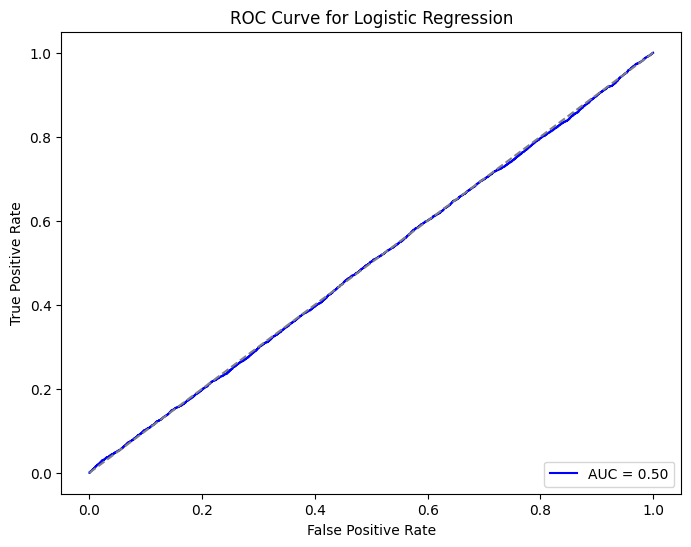

In [41]:
# Step 13: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [42]:
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.50


<h1>Decision Tree Classifier</h1>

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
# Step 3: Drop unnecessary columns (e.g., 'Patient_ID')
data = data.drop(columns=['Patient_ID'])

In [45]:
# Step 4: Encode the target variable
le = LabelEncoder()
data['Heart_Attack'] = le.fit_transform(data['Heart_Attack'])


In [46]:
# Step 5: One-hot encode categorical features
data = pd.get_dummies(data, drop_first=True)

In [47]:
# Step 6: Split features and target
X = data.drop('Heart_Attack', axis=1)
y = data['Heart_Attack']

In [48]:
# Step 7: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
tree_reg = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [50]:
# Prediction
y_pred = tree_reg.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Model Evaluation using Metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean absolute error:{mae:4f}")
print(f"mean squared error:{mse:4f}")
print(f"E-square:{r2:4f}")

mean absolute error:0.121536
mean squared error:0.121536
E-square:-0.138351


In [52]:
# model evaluation using feature importance

feature_importance = pd.Series(tree_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance

Blood_Pressure                   0.303681
Age                              0.180715
CVD_Risk_Score                   0.155083
Physical_Activity_Medium         0.094562
Alcohol_Consumption_Yes          0.071208
Province_Shandong                0.070745
Healthcare_Access_Moderate       0.069285
Employment_Status_Unemployed     0.054720
Region_Western                   0.000000
Province_Gansu                   0.000000
Province_Guangdong               0.000000
Province_Henan                   0.000000
Province_Qinghai                 0.000000
Province_Shanghai                0.000000
Region_Northern                  0.000000
Province_Sichuan                 0.000000
Hospital_Availability_Low        0.000000
Hospital_Availability_Medium     0.000000
TCM_Use_Yes                      0.000000
Employment_Status_Retired        0.000000
Income_Level_Low                 0.000000
Income_Level_Middle              0.000000
Chronic_Kidney_Disease_Yes       0.000000
Region_Southern                  0

In [53]:
# Step 8: Scale numerical features (optional for Decision Tree, but improves performance)
scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Step 10: Predict on the test set
y_pred = model.predict(X_test)


In [56]:
# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [57]:

# Print results
print(f"Accuracy: {accuracy:.2%}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 50.61%

Confusion Matrix:
[[21342 20696]
 [ 2940  2876]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.51      0.64     42038
           1       0.12      0.49      0.20      5816

    accuracy                           0.51     47854
   macro avg       0.50      0.50      0.42     47854
weighted avg       0.79      0.51      0.59     47854



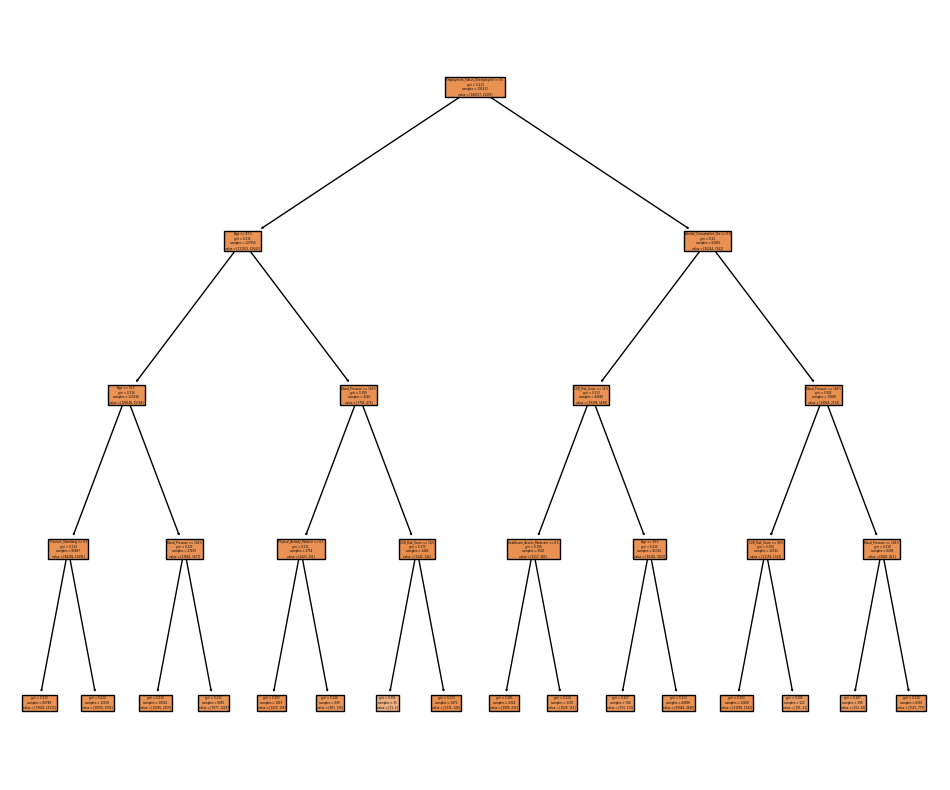

In [58]:
#Model Evaluation using Visualization

plt.figure(figsize=(12,10))
plot_tree(tree_reg, feature_names=X.columns, filled=True)
plt.show()

<h1>Decison Tree using Entropy</h1>

In [59]:
# create instance of model
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

In [60]:
# Step 2: Fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [61]:
# Step 3: Predict on test data
y_pred = clf_entropy.predict(X_test)

In [62]:
# model evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7710536214318552

# Decison Tree using GINI

In [63]:
# create instance of model
clf_gini = DecisionTreeClassifier(random_state = 42)

In [64]:
#fit the model on training data
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [65]:
y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_gini

0.7650144188573578

In [66]:
# Limit depth and complexity
clf_entropy = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=5,               # Limit tree depth
    min_samples_split=20,      
    random_state=42
)
clf_entropy.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=42)

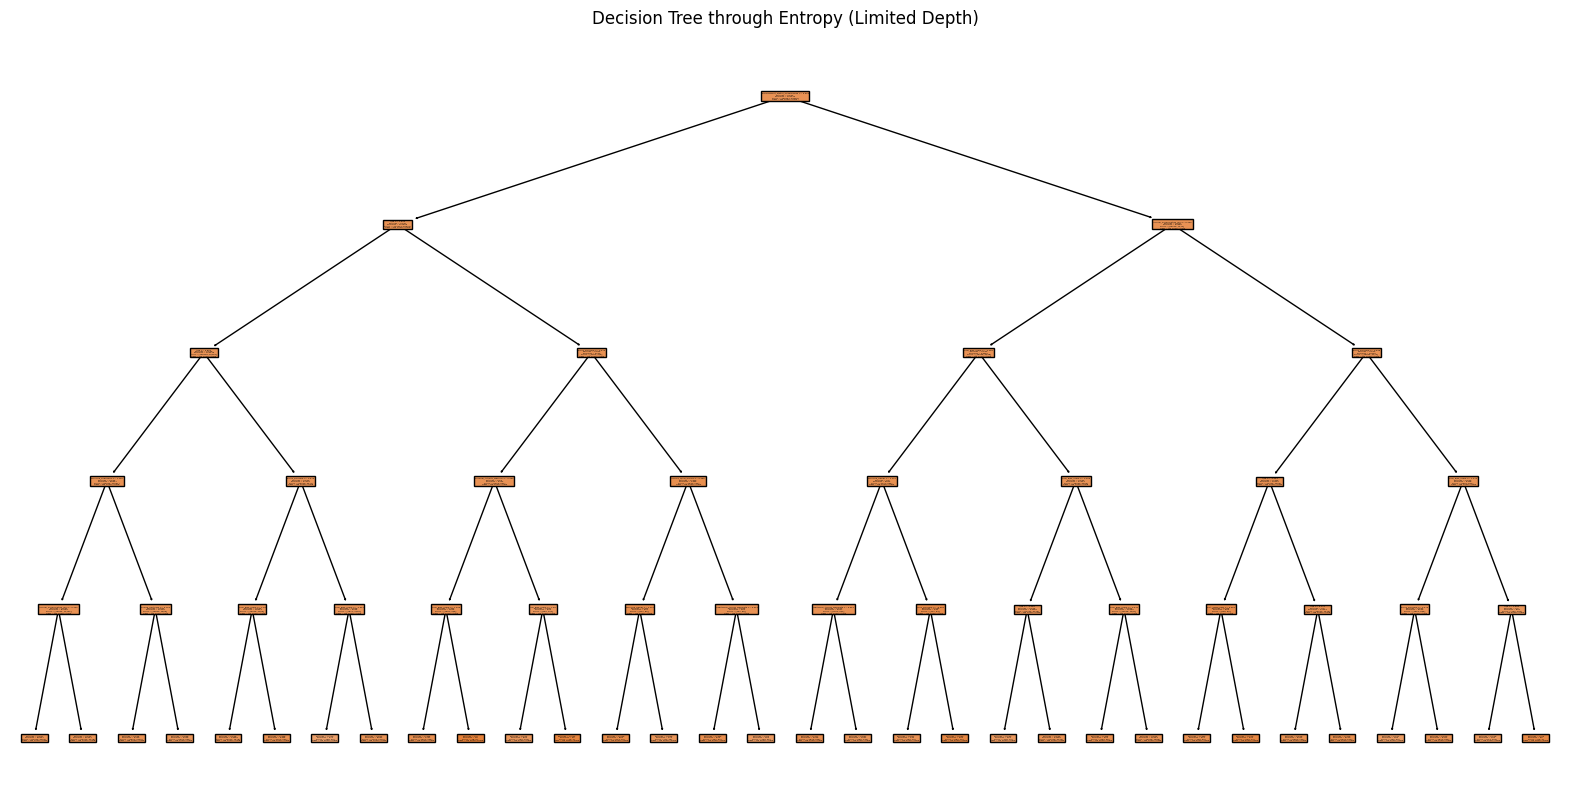

In [67]:
# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(
    clf_entropy, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['No Heart Attack', 'Heart Attack']
)
plt.title("Decision Tree through Entropy (Limited Depth)")
plt.show()


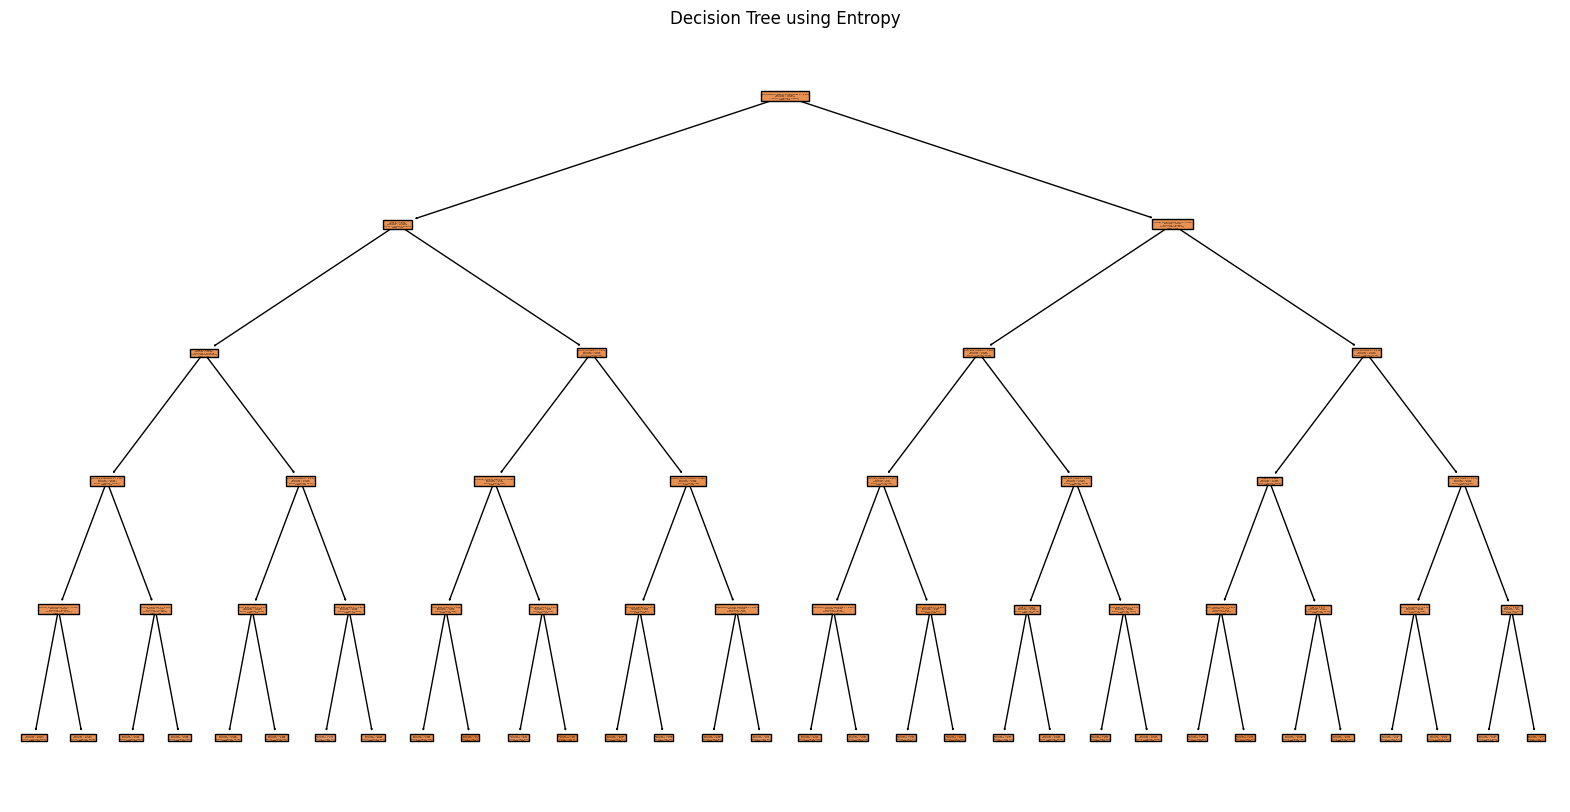

In [71]:
# Plot the decision tree using Entropy

plt.figure(figsize=(20, 10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.title("Decision Tree using Entropy")

plt.show()



In [ ]:
# Plot the decision tree using Gini

plt.figure(figsize=(20, 10))
plot_tree(clf_gini, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.title("Decision Tree using Gini")

plt.show()

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     42038
           1       0.00      0.00      0.00      5816

    accuracy                           0.88     47854
   macro avg       0.44      0.50      0.47     47854
weighted avg       0.77      0.88      0.82     47854


Confusion Matrix:
 [[42038     0]
 [ 5816     0]]


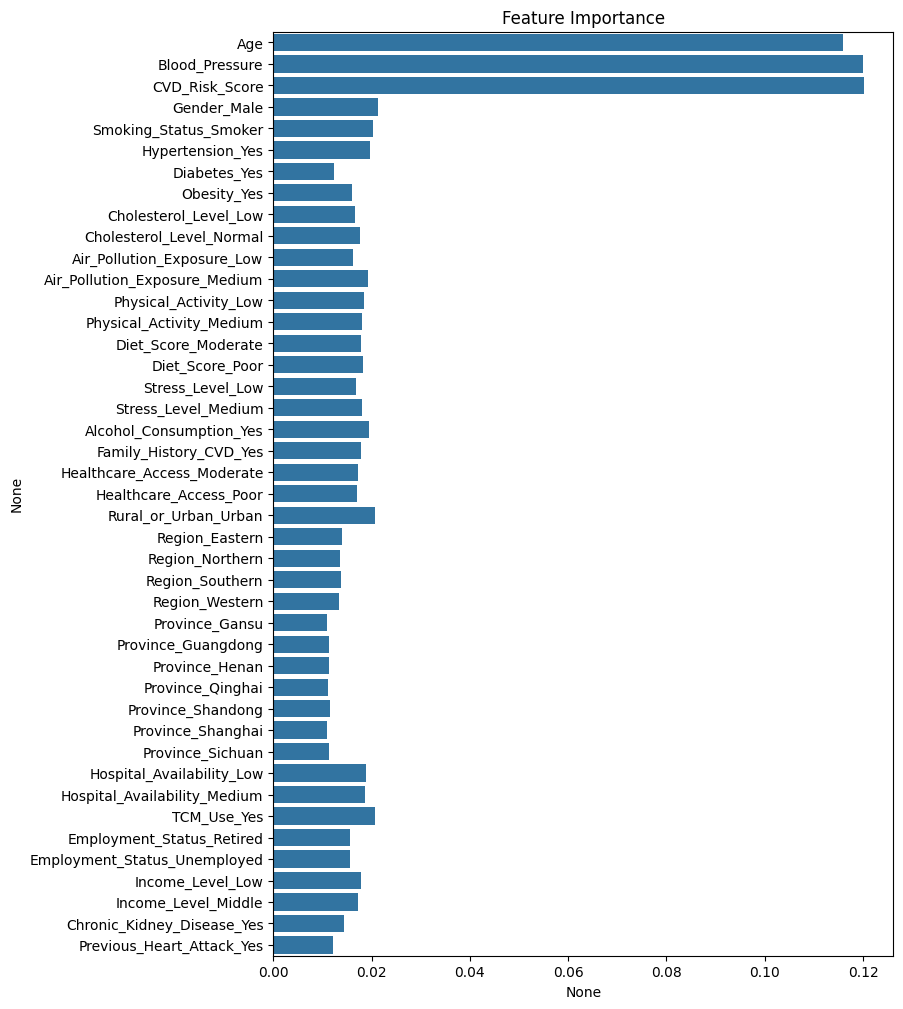

In [76]:
# Plot feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()


In [77]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define parameter grid

param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2)
grid_search.fit(X_train, y_train)


In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)


In [ ]:
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)


In [ ]:
# Predict on the test set
y_pred = best_rf.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))